# Импорт методов дихтомии и золтого сечения

In [1]:
from methods import dichotomy, golden_ratio

# Импорт функций для рисования графиков

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from graphics import plot_compare, plot_target

# Функции цели

In [3]:
from utils import PrintableFunction

In [13]:
from math import sin, exp, log, cos, e
from typing import Any

f_1 = PrintableFunction(lambda x: x**2 - 4*x + 115, "x^2 - 4x + 115")
f_2 = PrintableFunction(lambda x: -16*sin(x) + 4*x**2 - 10, "-16sin(x) + 4x^2 - 10")
f_3 = PrintableFunction(lambda x: 60*cos(0.3*x - 2) + 50, "60cos(0.3x - 2) + 50")

# Тестовый запуск

In [5]:
from utils import N_steps_dichotomy_analytical, N_steps_gr_analytical

In [77]:
a, b = -6, 6
f = f_1
digits = 3
eps = 10**-digits

a_d, b_d, n_d = dichotomy(f, a, b, eps)
a_g, b_g, n_g = golden_ratio(f, a, b, eps)

print(f"eps = {eps}\n")

print(f"Метод дихотомии:")
print(f"\tПолученный интервал: [{round(a_d, digits+1)}, {round(b_d, digits+1)}], число вызовов функции: {n_d}")
print(f"\tАналитический расчёт числа вызовов функции: {N_steps_dichotomy_analytical(a, b, eps)}\n")

print(f"Метод золотого сечения:")
print(f"\tПолученный интервал: [{round(a_g, digits+1)}, {round(b_g, digits+1)}], число вызовов функции: {n_g}")
print(f"\tАналитический расчёт числа вызовов функции: {N_steps_gr_analytical(a, b, eps)}\n")

eps = 0.001

Метод дихотомии:
	Полученный интервал: [1.9995, 2.0002], число вызовов функции: 28
	Аналитический расчёт числа вызовов функции: 28

Метод золотого сечения:
	Полученный интервал: [1.9997, 2.0005], число вызовов функции: 22
	Аналитический расчёт числа вызовов функции: 22



# Графики

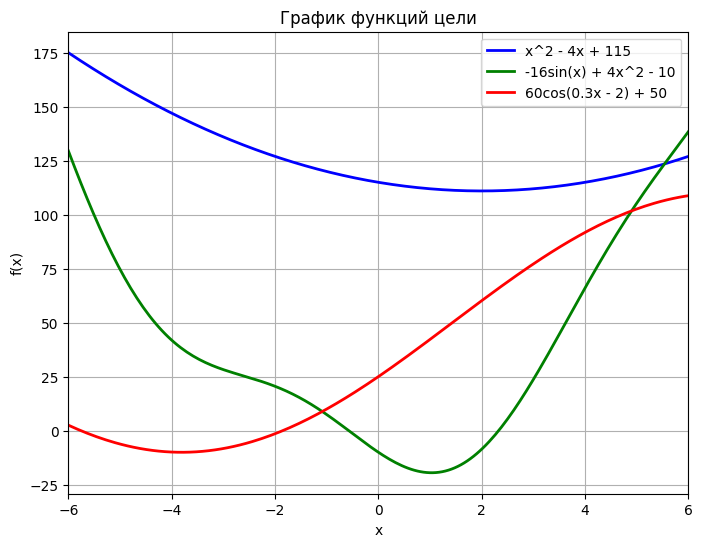

In [17]:
plot_target([f_1, f_2, f_3], a, b)

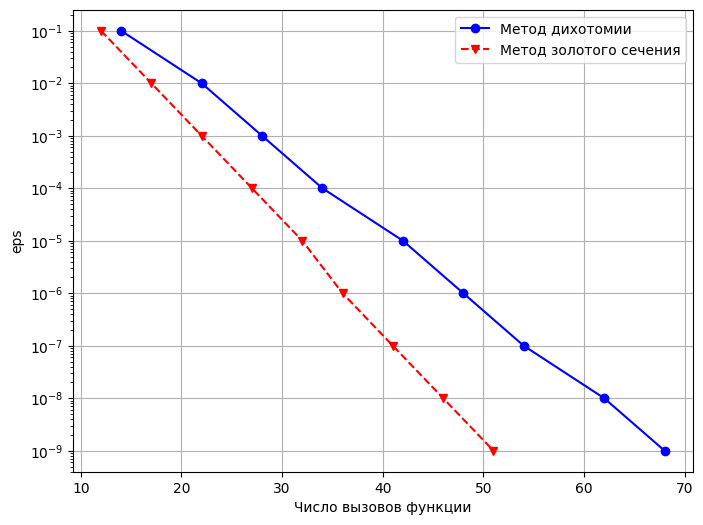

In [18]:
plot_compare(f_3, a, b, [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9])

In [20]:
new_function = PrintableFunction(lambda x: e**x - 1/3*x**3 + 2*x, "e^x - 1/3 x^3 + 2x")

a, b = -2, 1
f = new_function
digits = 3
eps = 3**-digits

a_d, b_d, n_d = dichotomy(f, a, b, eps)
a_g, b_g, n_g = golden_ratio(f, a, b, eps)

print(f"eps = {eps}\n")

print(f"Метод дихотомии:")
print(f"\tПолученный интервал: [{round(a_d, digits+1)}, {round(b_d, digits+1)}], число вызовов функции: {n_d}")
print(f"\tАналитический расчёт числа вызовов функции: {N_steps_dichotomy_analytical(a, b, eps)}\n")

print(f"Метод золотого сечения:")
print(f"\tПолученный интервал: [{round(a_g, digits+1)}, {round(b_g, digits+1)}], число вызовов функции: {n_g}")
print(f"\tАналитический расчёт числа вызовов функции: {N_steps_gr_analytical(a, b, eps)}\n")

eps = 0.037037037037037035

Метод дихотомии:
	Полученный интервал: [-1.5078, -1.4844], число вызовов функции: 14
	Аналитический расчёт числа вызовов функции: 14

Метод золотого сечения:
	Полученный интервал: [-1.5078, -1.4834], число вызовов функции: 12
	Аналитический расчёт числа вызовов функции: 12



In [78]:
def compare_epsilons(method, function, a, b, digits, method_name = None):
    if method_name:
        print(f"Метод: {method_name}\n")

    print(f"Функция: {function}\n")
    print(f"На интервале [{b}, {b}]\n")
    
    print('|' + '|'.join(map(str,epsilons)) + '|')
    print("|" +  '|'.join(["--"]*len(epsilons)) +"|")
    intervals = []
    number_of_calls = []
    for i in range(len(digits)):
        eps = 10**-digits[i]
        left_limit, right_limit, n = method(function, a, b, eps)
        intervals.append((round(left_limit,), round(right_limit, 5)))
        number_of_calls.append(n)
    print('|' + '|'.join(map(str,intervals)) + '|')
    print('|' + '|'.join(map(str,number_of_calls)) + '|')

In [79]:
#compare_epsilons(dichotomy, f_2, -6, 6, [0.1, 0.01, 0.001], method_name="Метод дихотомии")

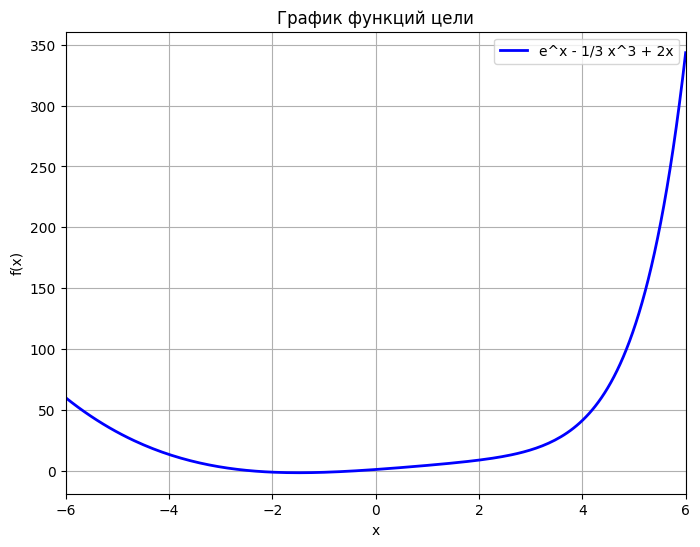

In [80]:
plot_target([new_function], a, b)

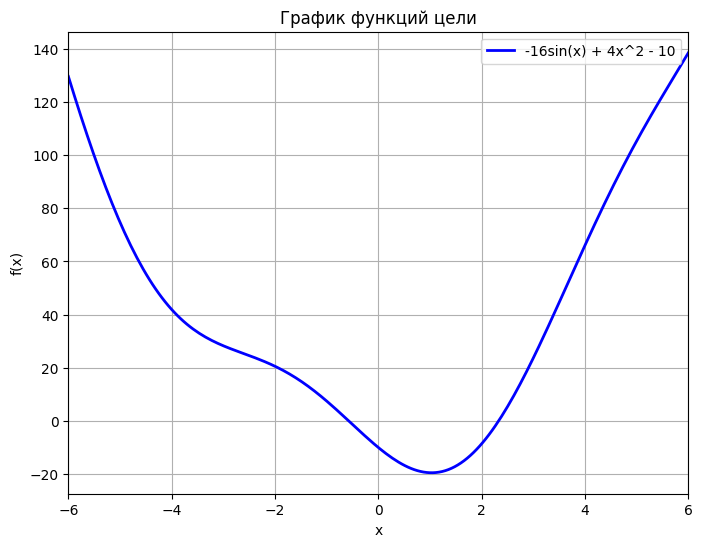

In [81]:
plot_target([f_2], -6, 6)

Метод: Метод золотого сечения

Функция: -16sin(x) + 4x^2 - 10

На интервале [6, 6]

|0.1|0.01|0.001|
|--|--|--|
|(0.96584, 1.06341)|(1.02614, 1.03494)|(1.0295, 1.03029)|
|12|17|22|

Метод: Метод дихотомии

Функция: -16sin(x) + 4x^2 - 10

На интервале [6, 6]

|0.1|0.01|0.001|
|--|--|--|
|(0.9375, 1.03125)|(1.02539, 1.03125)|(1.02979, 1.03052)|
|14|22|28|

Метод: Метод дихотомии сечения

Функция: e^x - 1/3 x^3 + 2x

На интервале [1, 1]

|0.1|0.01|0.001|
|--|--|--|
|(-1.53125, -1.4375)|(-1.49609, -1.49023)|(-1.4917, -1.49097)|
|10|18|24|

Метод: Метод золотого сечения

Функция: e^x - 1/3 x^3 + 2x

На интервале [1, 1]

|0.1|0.01|0.001|
|--|--|--|
|(-1.52284, -1.45898)|(-1.49845, -1.48913)|(-1.49217, -1.49133)|
|10|14|19|